In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('data.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
df.shape

(398, 9)

In [5]:
def box_kde_plot(data = None,feature=None):
    if data is not None and feature is not None:
        f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
        sns.boxplot(data = data,ax=ax1,y=feature)
        sns.kdeplot(data = data,ax=ax2,x=feature)
        plt.show()
    else:
        print("Please provide data and feature")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Univariate Analysis

In [7]:
def box_kde_plot(data = None,feature=None):
    if data is not None and feature is not None:
        f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
        sns.boxplot(data = data,ax=ax1,y=feature)
        sns.kdeplot(data = data,ax=ax2,x=feature)
        plt.show()
    else:
        print("Please provide data and feature")

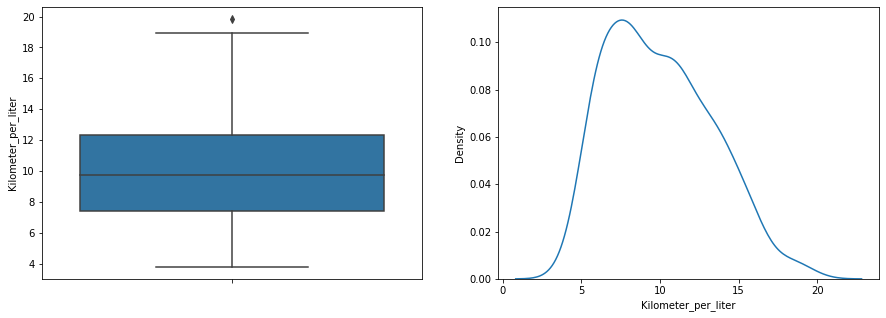

In [10]:
box_kde_plot(data = df,feature = 'Kilometer_per_liter')

In [11]:
def univariate_outlier_list(data= None,feature=None):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3-q1
    inner = q1 - 1.5*iqr
    outer = q3 + 1.5*iqr
    out = []
    for i,j in data[feature].iteritems():
        if j < inner or j > outer:
            out.append(i)

    return data[feature][out]

In [12]:
univariate_outlier_list(data = df,feature = 'Kilometer_per_liter')

322    19.811697
Name: Kilometer_per_liter, dtype: float64

In [13]:
df["Kilometer_per_liter"].describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

In [14]:
df.groupby(df["origin"])["displacement"].mean()

origin
1    245.901606
2    109.142857
3    102.708861
Name: displacement, dtype: float64

In [15]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

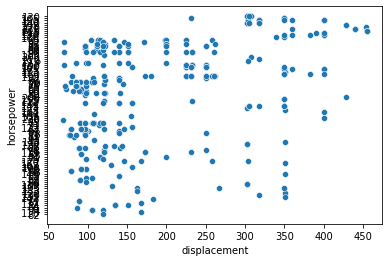

In [16]:
sns.scatterplot(data=df,x='displacement',y='horsepower')

In [17]:
df.horsepower = df.horsepower.replace({"?":np.nan})

In [18]:
df.horsepower.isna().sum()

6

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

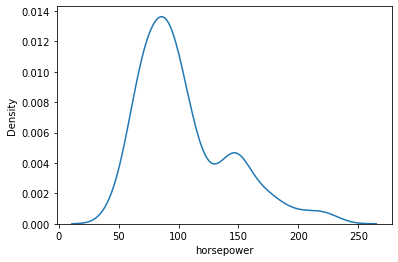

In [19]:
sns.kdeplot(df.horsepower.dropna().astype("int64"))

In [20]:
df.horsepower.dropna().astype("int64").describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [21]:
hpmv = df.horsepower.dropna().astype("int64").median()
df.horsepower.fillna(hpmv,inplace=True)

In [22]:
df.horsepower.isna().sum()

0

In [24]:
df[["displacement","horsepower"]].describe()

,displacement
count,398.000000
mean,193.425879
std,104.269838
min,68.000000
25%,104.250000
50%,148.500000
75%,262.000000
max,455.000000


In [25]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [26]:
df.horsepower = df.horsepower.astype("int64")

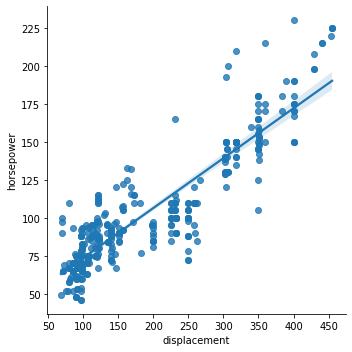

In [27]:
sns.lmplot(data = df[["displacement","horsepower"]],x="displacement",y="horsepower")

<AxesSubplot:xlabel='year', ylabel='horsepower'>

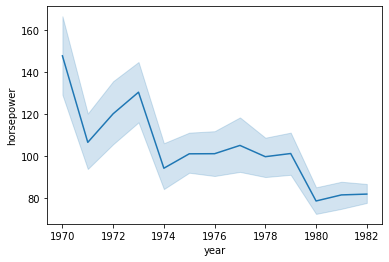

In [28]:
sns.lineplot(data=df,x='year',y='horsepower')

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=28)

In [30]:
xtrain.drop(labels="name",axis=1,inplace=True)

In [31]:
xtest.drop(labels="name",axis=1,inplace=True)

In [32]:
for i in xtrain.columns:
    r,p = pearsonr(xtrain[i],ytrain)
    print(p)

5.14654563361132e-23
3.0769932494969706e-55
6.585999410259926e-64
1.8581945344873532e-55
6.6557374556256336e-71
7.344932439904686e-13
1.348256960938695e-23


In [33]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif["features"] = xtrain.columns
vif

,VIF Factor,features
0,8.498535,origin
1,120.720624,cylinders
2,114.602570,displacement
3,82.151420,horsepower
4,162.885814,weight
5,86.361012,acceleration
6,170.845290,year


In [34]:
xtrain.drop(labels="acceleration",axis=1,inplace=True)

In [35]:
xtrain1 = sm.add_constant(xtrain)
sm.OLS(ytrain,xtrain1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.818
Model:                             OLS   Adj. R-squared:                  0.814
Method:                  Least Squares   F-statistic:                     202.5
Date:                 Fri, 11 Mar 2022   Prob (F-statistic):           4.52e-97
Time:                         20:28:28   Log-Likelihood:                -481.06
No. Observations:                  278   AIC:                             976.1
Df Residuals:                      271   BIC:                             1002.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -610.3152     49.284    -12.384      0.000    -707.344    -513.286
origin           0.5942      0.138      4.302      0.000       0.322       0.866
cylinders       -0.3414      0.160     -2.132      0.034      -0.657      -0.026
displacement     0.0113      0.004      2.762      0.006       0.003       0.019
horsepower      -0.0104      0.006     -1.890      0.060      -0.021       0.000
weight          -0.0028      0.000     -9.318      0.000      -0.003      -0.002
year             0.3180      0.025     12.757      0.000       0.269       0.367
==============================================================================
Omnibus:                       26.024   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.306
Skew:                           0.563   Prob(JB):                     3.95e-10
Kurtosis:                       4.572   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

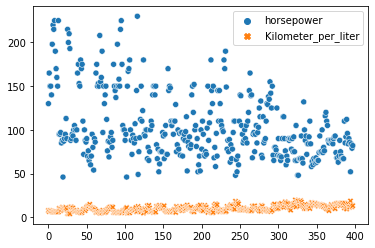

In [36]:
sns.scatterplot(data = df[["horsepower","Kilometer_per_liter"]])

In [37]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [38]:
xtest = xtest[["origin","horsepower"]]

In [41]:
ypred = model.predict(xtest)

C:\Users\HP\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- cylinders
- displacement
- weight
- year

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but LinearRegression is expecting 6 features as input.

In [ ]:
error = ytest - ypred

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

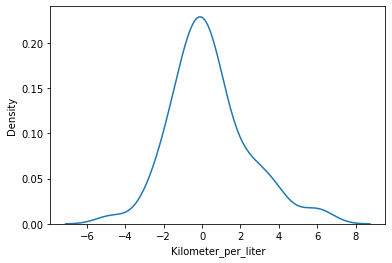

In [ ]:
sns.kdeplot(error)

In [ ]:
fv = model.predict(xtrain)

<AxesSubplot:ylabel='Kilometer_per_liter'>

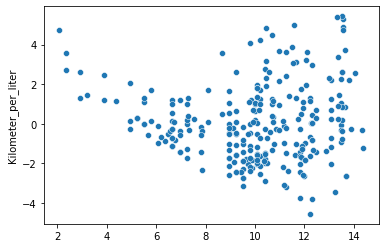

In [ ]:
sns.scatterplot(x = fv,y=ytrain-fv)

In [ ]:
ypred = model.predict(xtest)

array([10.33261439,  4.9429991 , 14.38937142,  6.37640742, 11.13532305,
       12.3609929 ,  6.66308909, 11.84496591, 10.33261439,  6.66308909,
       12.03858177,  9.52990573, 13.64399909, 13.07063576,  6.66308909,
       10.50462339,  5.80304409,  6.66308909, 10.01020325, 10.87024825,
        6.66308909,  9.93126006, 11.13532305, 13.64399909, 11.63722743,
       11.65135005,  7.23645242,  9.52990573, 11.32893891,  6.94977075,
        8.84186974,  2.64954578, 11.9239091 , 11.95963857, 13.64399909,
       12.24632024, 13.93068075, 11.09959358, 10.33261439, 12.21059076,
       11.13532305, 12.76234723, 12.0959181 ,  5.51636243,  7.12177975,
       13.64399909,  9.9885964 ,  7.80981575, 11.38627524,  8.9565424 ,
        3.33758178, 11.06386411, 14.33203508, 13.64399909,  9.72352159,
       11.9239091 ,  6.66308909, 11.24999572,  8.6914676 ,  7.40846141,
        7.80981575, 10.33261439, 12.47566557, 10.79130506,  4.36963577,
        9.52990573, 10.10326906, 10.10326906,  9.93126006, 13.52

In [ ]:
np.sqrt(mean_squared_error(ytest,ypred))

2.0570136292587144

In [ ]:
np.sqrt(mean_squared_error(ytrain,fv))

1.9029046532596432